# Age and numerical attributes preprocessing

## Age consistency

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# import and read data
FOLDER = './data/'
incidents_path = 'incidents.csv'

incidents_data = pd.read_csv(incidents_path)

ParserError: ignored

### Age attributes:
'participant_age1', \
'participant_age_group1', \
'participant_gender1', \
'min_age_participants', \
'avg_age_participants', \
'max_age_participants', \
'n_participants_child', \
'n_participants_teen', \
'n_participants_adult'

In [6]:
# drop duplicates rows
incidents_data.drop_duplicates(inplace=True)

In [7]:
# create new dataframe with correct data or NaN
ages_data = pd.DataFrame(columns=['min_age_participants', 'max_age_participants', 'avg_age_participants',
    'n_participants_child', 'n_participants_teen', 'n_participants_adult', 'inconsistent', 'NaN values'])

# fill new dataframe with NaN values and same index as incidents_data
ages_data = ages_data.reindex(incidents_data.index)

ages_data.head()

,min_age_participants,max_age_participants,avg_age_participants,n_participants_child,n_participants_teen,n_participants_adult,inconsistent,NaN values
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Min age participants

In [8]:
type(incidents_data['min_age_participants'][0])

str

In [9]:
int(float(incidents_data['min_age_participants'][0]))

19

In [10]:
incidents_data['min_age_participants'][:10]

0      19.0
1      62.0
2       NaN
3    248339
4       NaN
5      65.0
6      20.0
7       NaN
8      65.0
9      20.0
Name: min_age_participants, dtype: object

In [11]:
type(incidents_data['min_age_participants'][3])

str

In [12]:
count_null = 0
count_inconsistent = 0
count_str = 0
min_age_list = []

for index, row in incidents_data.iterrows():
    min_age = row['min_age_participants']
    if type(min_age) == float and np.isnan(min_age):
        count_null +=1
    elif type(min_age) == str:
        try:
            min_age = int(float(min_age))
            if min_age < 0 or min_age > 100:
                count_inconsistent += 1
            else:
                min_age_list.append(min_age)
                ages_data.loc[index, 'min_age_participants'] = min_age
        except:
            count_str += 1
print('NaN values: ', count_null)
print('Inconsistent values: ', count_inconsistent)
print('String values: ', count_str)
print('Total: ', count_null + count_inconsistent + count_str)

NaN values:  12809
Inconsistent values:  2013
String values:  973
Total:  15795


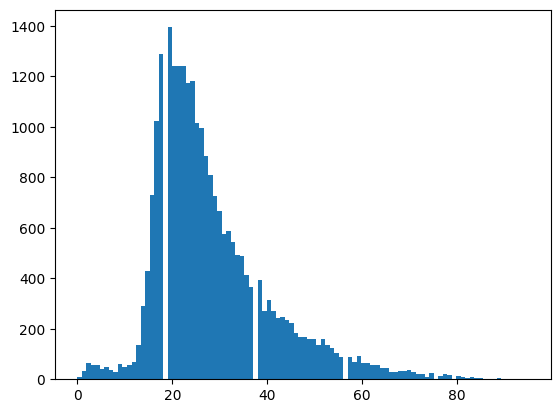

In [13]:
# plot min_age_participants distribution
plt.hist(min_age_list, bins=100)
plt.show()

### Max age participants

In [14]:
count_null = 0
count_inconsistent = 0
count_str = 0
max_age_list = []

for index, row in incidents_data.iterrows():
    max_age = row['max_age_participants']
    if type(max_age) == float and np.isnan(max_age):
        count_null +=1
    elif type(max_age) == str:
        try:
            max_age = int(float(max_age))
            if max_age < 0 or max_age > 100:
                count_inconsistent += 1
            else:
                max_age_list.append(max_age)
                ages_data.loc[index, 'max_age_participants'] = max_age
        except:
            count_str += 1
print('NaN values: ', count_null)
print('Inconsistent values: ', count_inconsistent)
print('String values: ', count_str)
print('Total: ', count_null + count_inconsistent + count_str)

NaN values:  12770
Inconsistent values:  2029
String values:  996
Total:  15795


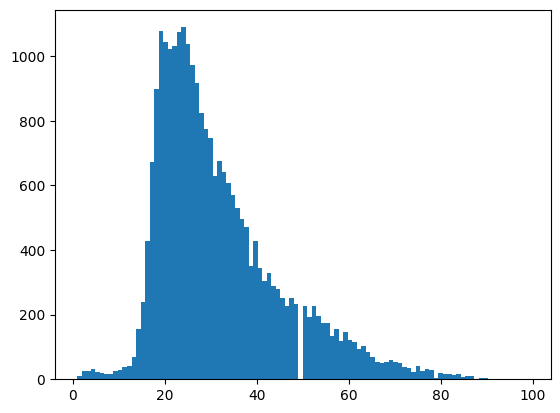

In [15]:
# plot max_age_participants distribution
plt.hist(max_age_list, bins=100)
plt.show()

### Average age participants

In [16]:
incidents_data['max_age_participants'][:10]

0      19.0
1      62.0
2       NaN
3    761203
4       NaN
5      65.0
6      30.0
7      -433
8      65.0
9      20.0
Name: max_age_participants, dtype: object

In [17]:
count_null = 0
count_incosistent = 0
count_str = 0
avg_age_list = []

for index, row in incidents_data.iterrows():
    avg_age = row['avg_age_participants']
    if type(avg_age) == float and np.isnan(avg_age):
        count_null +=1
    elif type(avg_age) == str:
        try:
            avg_age = int(float(avg_age))
            if avg_age < 0 or avg_age > 100:
                count_inconsistent += 1
            else:
                avg_age_list.append(avg_age)
                ages_data.loc[index, 'avg_age_participants'] = avg_age
        except:
            count_str += 1
print('NaN values: ', count_null)
print('Inconsistent values: ', count_inconsistent)
print('String values: ', count_str)
print('Total: ', count_null + count_inconsistent + count_str)

NaN values:  12783
Inconsistent values:  4064
String values:  977
Total:  17824


In [18]:
avg_age_list[:10]

[19, 62, 65, 26, 65, 20, 29, 29, 19, 38]

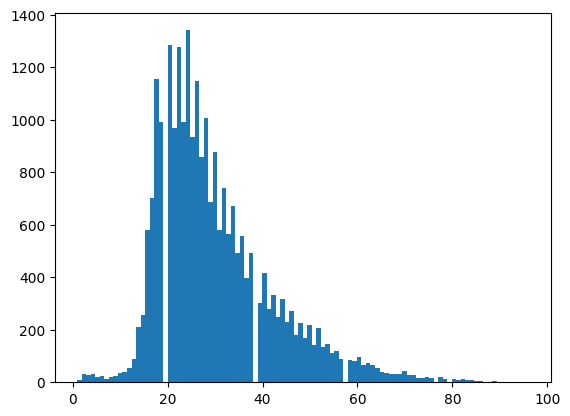

In [19]:
# plot max_age_participants distribution
plt.hist(avg_age_list, bins=100)
plt.show()

### Age distribuition

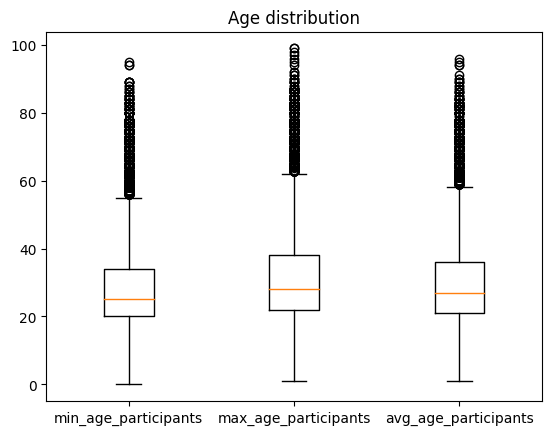

Mean min age: 28.372281534203243, std deviation: 12.407028661043146
Mean max age: 31.838078291814945, std deviation: 13.6703549844743
Mean avg age: 30.037485172004747, std deviation: 12.368956383258475


In [20]:
# box plot of min_age_participants, max_age_participants and avg_age_participants
plt.boxplot([min_age_list, max_age_list, avg_age_list])
plt.xticks([1, 2, 3], ['min_age_participants', 'max_age_participants', 'avg_age_participants'])
plt.title('Age distribution')
plt.show()

print(f'Mean min age: {np.mean(min_age_list)}, std deviation: {np.std(min_age_list)}')
print(f'Mean max age: {np.mean(max_age_list)}, std deviation: {np.std(max_age_list)}')
print(f'Mean avg age: {np.mean(avg_age_list)}, std deviation: {np.std(avg_age_list)}')

In [21]:
ages_data.head()

,min_age_participants,max_age_participants,avg_age_participants,n_participants_child,n_participants_teen,n_participants_adult,inconsistent,NaN values
0,19,19,19,NaN,NaN,NaN,NaN,NaN
1,62,62,62,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
incidents_data[['min_age_participants', 'n_participants_child', 'n_participants_teen', 'n_participants_adult']].head()

,min_age_participants,n_participants_child,n_participants_teen,n_participants_adult
0,19.0,0.0,0.0,1.0
1,62.0,0.0,0.0,1.0
2,NaN,NaN,NaN,NaN
3,248339,0.0,0.0,1.0
4,NaN,0.0,0.0,1.0


In [23]:
type(incidents_data['min_age_participants'][2])

float

In [24]:
np.isnan(incidents_data['n_participants_child'][2])

True

In [25]:
ages_data['min_age_participants'][0]

19

In [26]:
# check if Nan values are consistent
all_nan_row_count = 0
some_nan_count = 0
inconstitent_count = 0
indices = []

for index, row in incidents_data.iterrows():
    if (type(ages_data['min_age_participants'][index]) == float and np.isnan(ages_data['min_age_participants'][index]) and
        type(ages_data['max_age_participants'][index]) == float and np.isnan(ages_data['max_age_participants'][index]) and
        type(ages_data['avg_age_participants'][index]) == float and np.isnan(ages_data['avg_age_participants'][index]) and
        type(row['n_participants_child']) == float and np.isnan(row['n_participants_child']) and
        type(row['n_participants_teen']) == float and np.isnan(row['n_participants_teen']) and
        type(row['n_participants_adult']) == float and np.isnan(row['n_participants_adult'])):
        all_nan_row_count += 1
        indices.append(index)

    elif (
        (type(ages_data['min_age_participants'][index]) == float and np.isnan(ages_data['min_age_participants'][index])) or
        (type(ages_data['max_age_participants'][index]) == float and np.isnan(ages_data['max_age_participants'][index])) or
        (type(ages_data['avg_age_participants'][index]) == float and np.isnan(ages_data['avg_age_participants'][index])) or
        (type(row['n_participants_child']) == float and np.isnan(row['n_participants_child'])) or
        (type(row['n_participants_teen']) == float and np.isnan(row['n_participants_teen'])) or
        (type(row['n_participants_adult']) == float and np.isnan(row['n_participants_adult']))):
        some_nan_count += 1
        indices.append(index)

    else:
        try:
            int(float(row['n_participants_child']))
            int(float(row['n_participants_teen']))
            int(float(row['n_participants_adult']))
        except:
            inconstitent_count += 1
            indices.append(index)

print('Number of rows with all NaN values: ', all_nan_row_count)
print('Number of rows with some NaN values: ', some_nan_count)
print('Number of rows with non nummeric values: ', inconstitent_count)

Number of rows with all NaN values:  7143
Number of rows with some NaN values:  8682
Number of rows with non nummeric values:  0


In [27]:
# extrapolate from incidents_data row with some NaN values
incidents_data.loc[indices, ['min_age_participants', 'max_age_participants', 'avg_age_participants',
    'n_participants_child', 'n_participants_teen', 'n_participants_adult']]

,min_age_participants,max_age_participants,avg_age_participants,n_participants_child,n_participants_teen,n_participants_adult
2,NaN,NaN,NaN,NaN,NaN,NaN
3,248339,761203,707477,0.0,0.0,1.0
4,NaN,NaN,NaN,0.0,0.0,1.0
7,NaN,-433,a5d9anj8c,0.0,1.0,0.0
14,275009,NaN,283933,0.0,0.0,1.0
...,...,...,...,...,...,...
41077,NaN,NaN,NaN,NaN,NaN,NaN
41081,NaN,NaN,NaN,NaN,NaN,NaN
41086,NaN,NaN,NaN,NaN,NaN,NaN
41091,NaN,NaN,NaN,0.0,0.0,1.0


In [28]:
type(incidents_data['n_participants_child'][2])

numpy.float64

In [29]:
# copy in ages_data only numeric values from incidents_data
for index, row in incidents_data.iterrows():
    if index not in indices:
        try:
            ages_data.loc[index, 'n_participants_child'] = int(float(row['n_participants_child']))
            ages_data.loc[index, 'n_participants_teen'] = int(float(row['n_participants_teen']))
            ages_data.loc[index, 'n_participants_adult'] = int(float(row['n_participants_adult']))
        except:
            print(index)

Check if row not in indices have consistent values

Checks:
- min_age_participants < avg_age_participants < max_age_participants
- n_participants_child + n_participants_teen + n_participants_adult > 0

- $if$ min_age_participants < 12 $then$ n_participants_child > 0
- $if$ <= min_age_participants < 18 $then$ n_participants_teen > 0
- $if$ min_age_participants >= 18 $then$ n_participants_adult > 0

- $if$ max_age_participants < 12 $then$ n_participants_child > 0 and n_participants_teen = 0 and n_participants_adult = 0
- $if$ max_age_participants < 18 $then$ n_participants_teen > 0 or n_participants_child > 0 and n_participants_adult = 0
- $if$ max_age_participants >= 18 $then$ n_participants_adult > 0

note: teen = 12-17, child = 0-11, adult = 18+

In [30]:
indices2 = []

for index, row in ages_data.iterrows():
    if index not in indices:
        min_age = row['min_age_participants']
        max_age = row['max_age_participants']
        avg_age = row['avg_age_participants']
        n_child = row['n_participants_child']
        n_teen = row['n_participants_teen']
        n_adult = row['n_participants_adult']

        if min_age > max_age or min_age > avg_age or avg_age > max_age:
            indices2.append(index)
        if n_child + n_teen + n_adult <=  0 or n_child < 0 or n_teen < 0 or n_adult < 0:
            indices2.append(index)

        if min_age < 12 and n_child <= 0:
            indices2.append(index)
        elif 12 <= min_age < 18 and (n_teen < 0 or n_child > 0):
            indices2.append(index)
        elif min_age >= 18 and (n_adult <= 0 or n_child > 0 or n_teen > 0):
            indices2.append(index)

        if max_age < 12 and (n_child <= 0 or n_teen > 0 or n_adult > 0):
            indices2.append(index)
        elif 12 <= max_age < 18 and (n_teen <= 0 or n_adult > 0):
            indices2.append(index)
        elif max_age >= 18 and n_adult <= 0:
            indices2.append(index)

In [31]:
len(indices2)

430

In [32]:
incidents_data.loc[indices2, ['min_age_participants', 'max_age_participants', 'avg_age_participants',
    'n_participants_child', 'n_participants_teen', 'n_participants_adult']]

,min_age_participants,max_age_participants,avg_age_participants,n_participants_child,n_participants_teen,n_participants_adult
76,2.0,2.0,2.0,1.0,0.0,1.0
330,24.0,27.0,26.0,0.0,2.0,2.0
463,36.0,36.0,36.0,0.0,2.0,2.0
642,30.0,30.0,30.0,2.0,0.0,5.0
768,15.0,17.0,16.0,0.0,0.0,2.0
...,...,...,...,...,...,...
40783,62.0,62.0,62.0,0.0,1.0,2.0
40863,17.0,17.0,17.0,0.0,1.0,1.0
40887,43.0,43.0,43.0,0.0,2.0,1.0
40990,17.0,17.0,17.0,0.0,1.0,1.0


In [33]:
# fill ages_data with correct values
ages_data['inconsistent'] = False
ages_data['NaN values'] = False

for index, row in ages_data.iterrows():
    if index in indices:
        ages_data.loc[index, ['NaN values']] = True
    elif index in indices2:
        ages_data.loc[index, ['inconsistent']] = True

note: 'inconsiste values' means that min, max or averege ages are not compatible with the number of participants

In [34]:
ages_data.head()

,min_age_participants,max_age_participants,avg_age_participants,n_participants_child,n_participants_teen,n_participants_adult,inconsistent,NaN values
0,19,19,19,0,0,1,False,False
1,62,62,62,0,0,1,False,False
2,NaN,NaN,NaN,NaN,NaN,NaN,False,True
3,NaN,NaN,NaN,NaN,NaN,NaN,False,True
4,NaN,NaN,NaN,NaN,NaN,NaN,False,True


## Gender and other partecipants class consistency
'n_males',
'n_females',

'n_killed',
'n_injured',
'n_arrested',
'n_unharmed',

'n_participants'

In [35]:
incidents_data[['n_males', 'n_females', 'n_killed', 'n_injured', 'n_arrested', 'n_unharmed', 'n_participants']]

,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,NaN,NaN,0.0,1.0,0.0,1.0,2.0
3,1.0,0.0,0.0,1.0,0.0,0.0,2.0
4,1.0,0.0,0.0,1.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...
41089,1.0,0.0,0.0,1.0,0.0,0.0,1.0
41090,1.0,0.0,1.0,0.0,0.0,0.0,1.0
41091,2.0,0.0,1.0,0.0,1.0,0.0,2.0
41092,3.0,0.0,0.0,0.0,3.0,0.0,3.0


In [36]:
type(incidents_data['n_males'][2])

numpy.float64

In [37]:
type(incidents_data['n_males'][0])

numpy.float64

In [38]:
incidents_data['n_males'][2] < 0

False

In [39]:
# create new dataframe with correct values for
# 'n_males', 'n_females', 'n_killed', 'n_injured', 'n_arrested', 'n_unharmed', 'n_participants'
# or NaN values
class_data = pd.DataFrame(columns=['n_males', 'n_females', 'n_killed', 'n_injured', 'n_arrested', 'n_unharmed',
    'n_participants', 'inconsistent', 'NaN values'])

# fill new dataframe with NaN values and same index as incidents_data
class_data = class_data.reindex(incidents_data.index)

class_data.head()

,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,inconsistent,NaN values
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
i = 113
((type(incidents_data['n_males'][i]) == np.float64 and np.isnan(incidents_data['n_males'][i])) or
(type(incidents_data['n_females'][i]) == np.float64 and np.isnan(incidents_data['n_females'][i])) or
(type(incidents_data['n_killed'][i]) == np.float64 and np.isnan(incidents_data['n_killed'][i])) or
(type(incidents_data['n_injured'][i]) == np.float64 and np.isnan(incidents_data['n_injured'][i])) or
(type(incidents_data['n_arrested'][i]) == np.float64 and np.isnan(incidents_data['n_arrested'][i])) or
(type(incidents_data['n_unharmed'][i]) == np.float64 and np.isnan(incidents_data['n_unharmed'][i])) or
(type(incidents_data['n_participants'][i]) == np.float64 and np.isnan(incidents_data['n_participants'][i])))

True

In [41]:
# check if all values are numeric or NaN
indices_gender = []
indices_killed = []
indices_participants = []
indices_negative = []

for index, row in incidents_data.iterrows():
    flag = False

    # Nan values
    if ((type(incidents_data['n_males'][index]) == np.float64 and np.isnan(incidents_data['n_males'][index])) or
        (type(incidents_data['n_females'][index]) == np.float64 and np.isnan(incidents_data['n_females'][index]))):
        indices_gender.append(index)
        flag = True

    if ((type(incidents_data['n_killed'][index]) == np.float64 and np.isnan(incidents_data['n_killed'][index])) or
        (type(incidents_data['n_injured'][index]) == np.float64 and np.isnan(incidents_data['n_injured'][index])) or
        (type(incidents_data['n_arrested'][index]) == np.float64 and np.isnan(incidents_data['n_arrested'][index])) or
        (type(incidents_data['n_unharmed'][index]) == np.float64 and np.isnan(incidents_data['n_unharmed'][index]))):
        indices_killed.append(index)
        flag = True

    if (type(incidents_data['n_participants'][index]) == np.float64 and np.isnan(incidents_data['n_participants'][index])):
        indices_participants.append(index)
        flag = True

    if not flag:
        if (row['n_males'] < 0 or row['n_females'] < 0 or
            row['n_killed'] < 0 or row['n_injured'] < 0 or row['n_arrested'] < 0 or
            row['n_unharmed'] < 0 or row['n_participants'] < 0):
            indices_negative.append(index)

print('Number of rows with NaN values for gender: ', len(indices_gender))
print('Number of rows with NaN values for killed: ', len(indices_killed))
print('Number of rows with NaN values for participants: ', len(indices_participants))
print('Number of rows with negative values: ', len(indices_negative))

Number of rows with NaN values for gender:  6135
Number of rows with NaN values for killed:  4675
Number of rows with NaN values for participants:  1
Number of rows with negative values:  0


In [42]:
# check if nan index in gender contains nan values in killed and participants
same_nan = []
for i in indices_gender:
    if i in indices_killed:
        same_nan.append(i)
print('Number of indices w NaN values in gender and killed: ', len(same_nan))

Number of indices w NaN values in gender and killed:  4415


In [51]:
for index, row in incidents_data.iterrows():
    try:
      class_data.loc[index, ['n_participants']] = int(row['n_participants'])
    except:
      class_data.loc[index, ['n_participants']] = np.nan

    if index not in indices_gender:
        class_data.loc[index, ['n_males']] = int(row['n_males'])
        class_data.loc[index, ['n_females']] = int(row['n_females'])
    if index not in indices_killed:
        class_data.loc[index, ['n_killed']] = int(row['n_killed'])
        class_data.loc[index, ['n_injured']] = int(row['n_injured'])
        class_data.loc[index, ['n_arrested']] = int(row['n_arrested'])
        class_data.loc[index, ['n_unharmed']] = int(row['n_unharmed'])

class_data

,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,inconsistent,NaN values
0,1,0,0,1,0,0,1,NaN,NaN
1,1,0,1,0,0,0,1,NaN,NaN
2,NaN,NaN,0,1,0,1,2,NaN,NaN
3,1,0,0,1,0,0,2,NaN,NaN
4,1,0,0,1,0,1,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...
41089,1,0,0,1,0,0,1,NaN,NaN
41090,1,0,1,0,0,0,1,NaN,NaN
41091,2,0,1,0,1,0,2,NaN,NaN
41092,3,0,0,0,3,0,3,NaN,NaN


In [52]:
class_data['inconsistent'] = False
class_data['NaN values'] = False

# check if numeric values are consistent
for index, row in class_data.iterrows():
    flag_inconsistent = False
    flag_nan = True

    # gender
    if index not in indices_gender:
        flag_nan = False
        if np.sum([row['n_males'], row['n_females']]) != row['n_participants']:
            flag_inconsistent = True

    # killed
    if index not in indices_killed:
        flag_nan = False
        if (np.sum([row['n_killed'], row['n_injured']]) > row['n_participants'] or
            row['n_arrested'] > row['n_participants'] or row['n_unharmed'] > row['n_participants']):
            flag_inconsistent = True

    # update boolean columns
    if flag_inconsistent:
            class_data.loc[index, ['inconsistent']] = True
    if flag_nan:
        class_data.loc[index, ['NaN values']] = 'NaN values'

class_data.head()

,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,inconsistent,NaN values
0,1,0,0,1,0,0,1,False,False
1,1,0,1,0,0,0,1,False,False
2,NaN,NaN,0,1,0,1,2,False,False
3,1,0,0,1,0,0,2,True,False
4,1,0,0,1,0,1,2,True,False


## Participant n. 1 data
'participant_age1', \
'participant_age_group1', \
'participant_gender1'

note: partecipant randomly chosen

In [53]:
incidents_data[['participant_age1', 'participant_age_group1', 'participant_gender1']]

,participant_age1,participant_age_group1,participant_gender1
0,19.0,Adult 18+,Male
1,62.0,Adult 18+,Male
2,NaN,NaN,NaN
3,NaN,Adult 18+,Male
4,NaN,Adult 18+,Male
...,...,...,...
41089,27.0,Adult 18+,Male
41090,39.0,Adult 18+,Male
41091,NaN,Adult 18+,Male
41092,31.0,Adult 18+,Male


In [54]:
# range age participant1 and category age group
print('Range age participant1: ', incidents_data['participant_age1'].min(), incidents_data['participant_age1'].max())
print('Number of NaN values in age partecipant1: ', incidents_data['participant_age1'].isna().sum())
print('Age group category: ', incidents_data['participant_age_group1'].unique())
print('Number of NaN values in age group category: ', incidents_data['participant_age_group1'].isna().sum())

Range age participant1:  0.0 101.0
Number of NaN values in age partecipant1:  15794
Age group category:  ['Adult 18+' nan 'Teen 12-17' 'Child 0-11']
Number of NaN values in age group category:  7173


In [55]:
# paticipant 1 new DataFrame
participant1 = pd.DataFrame(columns=['participant_age1', 'participant_age_group1', 'participant1_child',
    'participant1_teen', 'participant1_adult', 'participant_gender1', 'participant1_male', 'participant1_female',
    'inconsistent', 'NaN values'])
participant1 = participant1.reindex(incidents_data.index)
participant1.head()

,participant_age1,participant_age_group1,participant1_child,participant1_teen,participant1_adult,participant_gender1,participant1_male,participant1_female,inconsistent,NaN values
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
display(type(incidents_data['participant_age1'][0])) # Numeric
display(type(incidents_data['participant_age1'][2])) # NaN
display(type(incidents_data['participant_age_group1'][0])) # category
display(type(incidents_data['participant_age_group1'][2])) # NaN

numpy.float64

numpy.float64

str

float

In [57]:
(type(incidents_data['participant_age_group1'][2]) == float and np.isnan(incidents_data['participant_age_group1'][2]) or
incidents_data['participant_age_group1'][2] not in ['Adult 18+', 'Teen 12-17', 'Child 0-11'])

True

In [58]:
np.isnan(incidents_data['participant_age1'][2]) # NaN value

True

Check consistency of participant_age1 and participant_age_group1 \
Note: code divided in three cells in order to avoid kernel crash

In [59]:
# default boolean values (False)
participant1['inconsistent'] = False
participant1['NaN values'] = False


for index, row in incidents_data.iterrows():
    flag = False # flag for presence NaN values
    inconsitence = False # flag for presence of inconsistent values

    # set participant_age1
    if np.isnan(row['participant_age1']):
        flag = True
    else:
        try:
            age = int(row['participant_age1'])
            if age < 0 or age > 100:
                flag = True
            else:
                participant1.loc[index, ['participant_age1']] = age
        except:
            flag = True

    # set boolean columns
    if flag:
        participant1.loc[index, ['NaN values']] = True
    if inconsitence:
        participant1.loc[index, ['inconsistent']] = True

In [60]:
# default boolean values (False)
participant1['inconsistent'] = False
participant1['NaN values'] = False


for index, row in incidents_data.iterrows():
    flag = False # flag for presence NaN values
    inconsitence = False # flag for presence of inconsistent values

    # set participant_age_group and check consistency
    if (type(row['participant_age_group1']) == float and np.isnan(row['participant_age_group1']) or
        row['participant_age_group1'] not in ['Adult 18+', 'Teen 12-17', 'Child 0-11']):
        if not flag: # if age is consistent and age_group is NaN set age_group
            if age < 12:
                participant1.loc[index, ['participant_age_group1']] = 'Child 0-11'
            elif 12 <= age < 18:
                participant1.loc[index, ['participant_age_group1']] = 'Teen 12-17'
            else:
                participant1.loc[index, ['participant_age_group1']] = 'Adult 18+'
        else:
            flag = True # NaN values in age_group
    else:
        age_group = row['participant_age_group1']
        inconsitence = True
        if age_group == 'Adult 18+':
            if flag and (age < 18):
                inconsitence = False
            if age >= 18:
                participant1.loc[index, ['participant_age_group1']] = 'Adult 18+'
        elif age_group == 'Teen 12-17':
            if flag and (age < 12 or age >= 18):
                inconsitence = False
            if 12 <= age < 18:
                participant1.loc[index, ['participant_age_group1']] = 'Teen 12-17'
        else:
            if flag and (age >= 12):
                inconsitence = False
            if age < 12:
                participant1.loc[index, ['participant_age_group1']] = 'Child 0-11'

        # check consistency age w.r.t. other attributes
        if ages_data['inconsistent'][index]:
            if age_group == 'Adult 18+':
                if ages_data['n_participants_adult'][index] <= 0:
                    inconsitence = True
            if age_group == 'Teen 12-17':
                if ages_data['n_participants_teen'][index] <= 0:
                    inconsitence = True
            else:
                if ages_data['n_participants_child'][index] <= 0:
                    inconsitence = True

    # change boolean columns
    if not flag and participant1['NaN values'][index]:
        participant1.loc[index, ['NaN values']] = False
    if not inconsitence and participant1['inconsistent'][index]:
        participant1.loc[index, ['inconsistent']] = False

In [61]:
for index, row in incidents_data.iterrows():
    flag = False # flag for presence NaN values
    inconsitence = False # flag for presence of inconsistent values

    # set participant_gender1 values
    gender = row['participant_gender1']
    if gender in ['Male', 'Female']:
        participant1.loc[index, 'participant_gender1'] = gender
        # check consistency participant_gender1 w.r.t. other attributes
        if class_data['inconsistent'][index]:
            if gender == 'Male' and (class_data['n_males'][index] <= 0):
                inconsitence = True
            elif gender == 'Female' and (class_data['n_females'][index] <=0):
                inconsistence = True
        else:
            inconsistence = True
    else:
        flag = True

    # change boolean columns
    if not flag and participant1['NaN values'][index]:
        participant1.loc[index, ['NaN values']] = False
    if not inconsitence and participant1['inconsistent'][index]:
        participant1.loc[index, ['inconsistent']] = False

In [62]:
participant1.head()

,participant_age1,participant_age_group1,participant1_child,participant1_teen,participant1_adult,participant_gender1,participant1_male,participant1_female,inconsistent,NaN values
0,19,Adult 18+,NaN,NaN,NaN,Male,NaN,NaN,False,False
1,62,Adult 18+,NaN,NaN,NaN,Male,NaN,NaN,False,False
2,NaN,Adult 18+,NaN,NaN,NaN,NaN,NaN,NaN,False,False
3,NaN,Adult 18+,NaN,NaN,NaN,Male,NaN,NaN,False,False
4,NaN,Adult 18+,NaN,NaN,NaN,Male,NaN,NaN,False,False


In [63]:
# One hot encoding for participant_gender1 and participant_age_group1

for index, row in participant1.iterrows():

    # gender
    if not (type(row['participant_gender1']) == float and np.isnan(row['participant_gender1'])):
        # set default values to 0 # set default values to 0
        participant1.loc[index, ['participant1_male']] = 0
        participant1.loc[index, ['participant1_female']] = 0
        if row['participant_gender1'] == 'Male':
            participant1.loc[index, ['participant1_male']] = 1
        else:
            participant1.loc[index, ['participant1_female']] = 1

    # age group
    if not (type(row['participant_age_group1']) == float and np.isnan(row['participant_age_group1'])):
        # set default values to 0
        participant1.loc[index, ['participant1_child']] = 0
        participant1.loc[index, ['participant1_teen']] = 0
        participant1.loc[index, ['participant1_adult']] = 0

        if row['participant_age_group1'] == 'Child 0-11':
            participant1.loc[index, ['participant1_child']] = 1
        elif row['participant_age_group1'] == 'Teen 12-17':
            participant1.loc[index, ['participant1_teen']] = 1
        elif row['participant_age_group1'] == 'Adult 18+':
            participant1.loc[index, ['participant1_adult']] = 1

In [64]:
participant1.head()

,participant_age1,participant_age_group1,participant1_child,participant1_teen,participant1_adult,participant_gender1,participant1_male,participant1_female,inconsistent,NaN values
0,19,Adult 18+,0,0,1,Male,1,0,False,False
1,62,Adult 18+,0,0,1,Male,1,0,False,False
2,NaN,Adult 18+,0,0,1,NaN,NaN,NaN,False,False
3,NaN,Adult 18+,0,0,1,Male,1,0,False,False
4,NaN,Adult 18+,0,0,1,Male,1,0,False,False


## Merge new DataFrame columns

In [65]:
ages_data.head()

,min_age_participants,max_age_participants,avg_age_participants,n_participants_child,n_participants_teen,n_participants_adult,inconsistent,NaN values
0,19,19,19,0,0,1,False,False
1,62,62,62,0,0,1,False,False
2,NaN,NaN,NaN,NaN,NaN,NaN,False,True
3,NaN,NaN,NaN,NaN,NaN,NaN,False,True
4,NaN,NaN,NaN,NaN,NaN,NaN,False,True


In [66]:
class_data.head()

,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,inconsistent,NaN values
0,1,0,0,1,0,0,1,False,False
1,1,0,1,0,0,0,1,False,False
2,NaN,NaN,0,1,0,1,2,False,False
3,1,0,0,1,0,0,2,True,False
4,1,0,0,1,0,1,2,True,False


In [67]:
# create one only column for 'inconsistent values' and 'NaN values'
inconsistent_column = []
nan_values_column = []

for index, row in ages_data.iterrows():
    # check inconsistence parteicipant1
    if participant1['inconsistent'][index]:
        inconsistent_column.append(True)
    # else: check inconsistence between ages_data and class_data
    elif row['inconsistent'] or class_data['inconsistent'][index]:
        inconsistent_column.append(True)
    elif (row['n_participants_child'] + row['n_participants_teen'] + row['n_participants_adult'] !=
        class_data['n_participants'][index]):
        inconsistent_column.append(True)
    else:
        inconsistent_column.append(False)

    # check NaN values
    if participant1['NaN values'][index]:
        nan_values_column.append(True)
    elif row['NaN values'] or class_data['NaN values'][index]:
        nan_values_column.append(True)
    else:
        nan_values_column.append(False)

In [68]:
# drop inconsistent and NaN values colums
ages_data.drop(columns=['inconsistent', 'NaN values'], inplace=True)
class_data.drop(columns=['inconsistent', 'NaN values'], inplace=True)
participant1.drop(columns=['inconsistent', 'NaN values'], inplace=True)

# merge ages_data, class_data and participant1
data = pd.merge(ages_data, class_data, left_index=True, right_index=True)
data = pd.merge(data, participant1, left_index=True, right_index=True)

# add inconsistent and NaN values colums
data['inconsistent'] = inconsistent_column
data['NaN_values'] = nan_values_column

In [69]:
data.head()

,min_age_participants,max_age_participants,avg_age_participants,n_participants_child,n_participants_teen,n_participants_adult,n_males,n_females,n_killed,n_injured,...,participant_age1,participant_age_group1,participant1_child,participant1_teen,participant1_adult,participant_gender1,participant1_male,participant1_female,inconsistent,NaN_values
0,19,19,19,0,0,1,1,0,0,1,...,19,Adult 18+,0,0,1,Male,1,0,False,False
1,62,62,62,0,0,1,1,0,1,0,...,62,Adult 18+,0,0,1,Male,1,0,False,False
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,...,NaN,Adult 18+,0,0,1,NaN,NaN,NaN,True,True
3,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,1,...,NaN,Adult 18+,0,0,1,Male,1,0,True,True
4,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,1,...,NaN,Adult 18+,0,0,1,Male,1,0,True,True


## Save post processing data

In [71]:
# write data in csv file
data.to_csv('new_columns_incidents.csv', index=False)

### Data columns:
All numeric data are save as int64 \
'participant_age_group1' and 'participant_gender1' are saved as string \
missing n.a. values are saved as np.nan


Additional columns:
- 'participant_age_group1' (str): partecipants1's age range \
one hot encoding columns: 'participant1_child', 'participant1_teen', 'participant1_adult'
- 'participant_gender1' (str): partecipants1's gender \
one hot encoding columns: 'participant1_male', 'participant1_female'
- 'inconsistent' (bool): valori numerici non consistenti tra loro (es. numero totale di individui non ritorna o età minima 18+ ma segnalata la presenza di bambini)
- 'NaN_values' (bool): presenza (o meno) di uno o più valore NaN nella riga

In [72]:
data

,min_age_participants,max_age_participants,avg_age_participants,n_participants_child,n_participants_teen,n_participants_adult,n_males,n_females,n_killed,n_injured,...,participant_age1,participant_age_group1,participant1_child,participant1_teen,participant1_adult,participant_gender1,participant1_male,participant1_female,inconsistent,NaN_values
0,19,19,19,0,0,1,1,0,0,1,...,19,Adult 18+,0,0,1,Male,1,0,False,False
1,62,62,62,0,0,1,1,0,1,0,...,62,Adult 18+,0,0,1,Male,1,0,False,False
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,...,NaN,Adult 18+,0,0,1,NaN,NaN,NaN,True,True
3,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,1,...,NaN,Adult 18+,0,0,1,Male,1,0,True,True
4,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,1,...,NaN,Adult 18+,0,0,1,Male,1,0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41089,27,27,27,0,0,1,1,0,0,1,...,27,Adult 18+,0,0,1,Male,1,0,False,False
41090,39,39,39,0,0,1,1,0,1,0,...,39,Adult 18+,0,0,1,Male,1,0,False,False
41091,NaN,NaN,NaN,NaN,NaN,NaN,2,0,1,0,...,NaN,Adult 18+,0,0,1,Male,1,0,True,True
41092,29,34,31,0,0,3,3,0,0,0,...,31,Adult 18+,0,0,1,Male,1,0,False,False


In [73]:
# number of rows with NaN values and inconsistent values
print('Number of raw with NaN values: ', data[(data['NaN_values'] == True)].shape[0])
print('Number of raw with inconsistent values: ', data[(data['inconsistent'] == True)].shape[0])

Number of raw with NaN values:  15831
Number of raw with inconsistent values:  19196
